# MVP

### Project Description
This project aims to identify customer churn factors for TELCO, to reduce churn and improve customer loyalty.

### Project Goals
The primary goals of this project were to:
Identify customer churn drivers.
Build a churn prediction model.
Present findings to TELCO stakeholders.
### Initial Questions
* Does being a senior citizen have a significant impact on customer churn?
* Does tenure have a significant impact on customer churn?
* Does internet service type have a significant impact on customer churn?


In [1]:

#Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
import acquire
import prepare
import model

# ignore warnings
import warnings 
warnings.filterwarnings("ignore")

## ACQUIRE

##### Acquire the data


In [2]:

df = acquire.get_telco_churn_data()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

## PREPARE

In [3]:
# Prepare the data
df = prepare.prep_telco_churn(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   int64  
 7   dependents                7043 non-null   int64  
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   int64  
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
# Split the data into train, validate, and test sets
train, validate, test = prepare.split_data(df)
print(f'train: {train.shape}')
print(f'validate: {validate.shape}')
print(f'test: {test.shape}')

train: (3943, 24)
validate: (1691, 24)
test: (1409, 24)


## EXPLORE

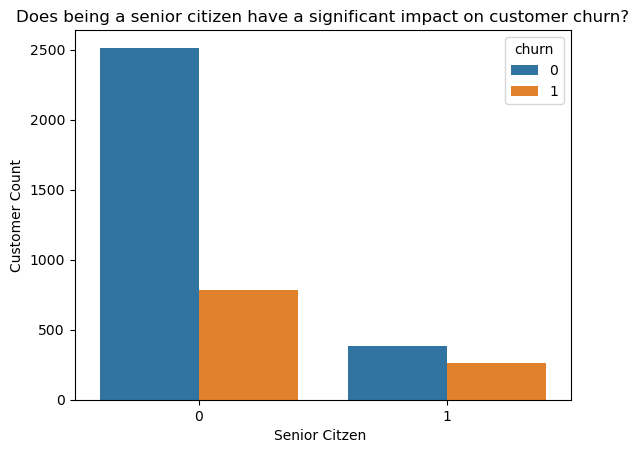

In [5]:
#  Explore the senior citizen vs churn
senior=sns.countplot(data=train, x='senior_citizen', hue='churn')
senior.set_xlabel('Senior Citzen ')
senior.set_ylabel('Customer Count')
plt.title('Does being a senior citizen have a significant impact on customer churn?')
plt.show()

### Exploring and Visualizations Senior Citizen  Findings
* The visualization shows that there are more senior citizens who churned than non-senior citizens who churned.
* The proportion of senior citizens who churned is higher than the proportion of non-senior citizens who churned.
* This suggests that senior citizen status is a significant factor that can influence customer churn.


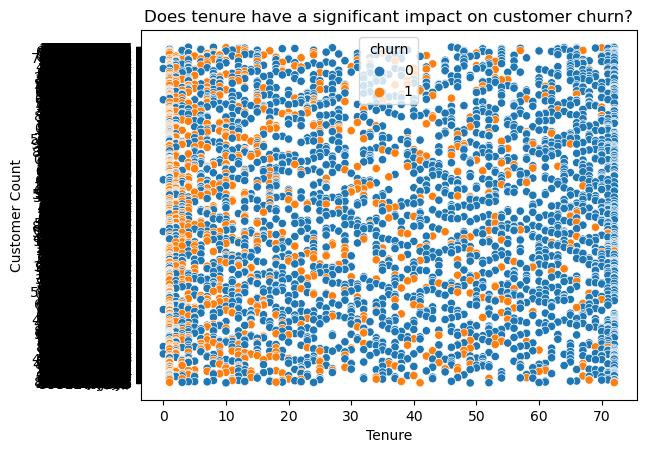

In [6]:
#Visualizing the tenure vs churn
dp=sns.scatterplot(data=train, x='tenure',y='customer_id', hue='churn')
dp.set_xlabel('Tenure')
dp.set_ylabel('Customer Count')
plt.title('Does tenure have a significant impact on customer churn?')
plt.show()

### Exploring and Visualizations Tenure  Findings
* The scatterplot shows that there is a general trend of churn increasing with tenure.
* However, there are some customers who churned early in their tenure, and some customers who did not churn even after a long tenure.
* This suggests that tenure is not the only factor that can influence customer churn.


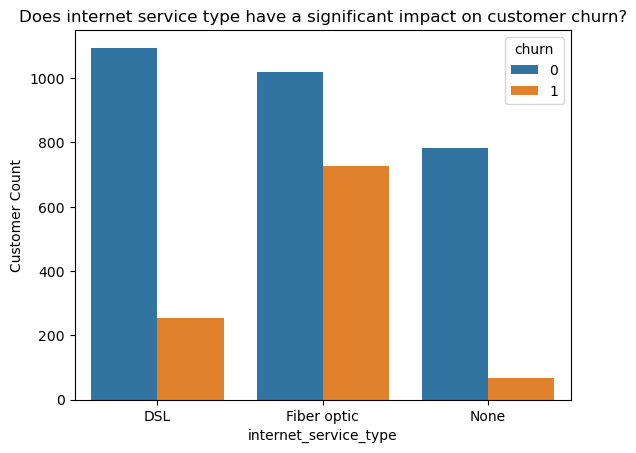

In [7]:
#Visualizing the internet service vs churn
st=sns.countplot(data=train, x='internet_service_type', hue='churn')
st.set_xlabel('internet_service_type')
st.set_ylabel('Customer Count')
plt.title('Does internet service type have a significant impact on customer churn?')
plt.show()

### Exploring and Visualizations Internet Service Type Findings
* The visualization shows that there are more customers with DSL who churned than customers with fiber optic or no internet service who churned.
* The proportion of customers with DSL who churned is higher than the proportion of customers with fiber optic or no internet service who churned.
* This suggests that internet service type is a significant factor that can influence customer churn.


## Statistical Testing 
#### Senior Citizen Hypothesis:  
    • alpha = .05 
    • H0 = Senior Citizen status is independent of customer churn 
    • Ha = Senior Citizen status is  dependent to customer churn  

 

In [8]:
alpha = 0.05
senior_observed = pd.crosstab(train.senior_citizen, train.churn)
senior_observed

churn,0,1
senior_citizen,,
0,2514,787
1,383,259


In [9]:
# Example contingency table
senior_observed1 = np.array([[2514, 787],
                         [383, 259]])

In [10]:
chi2, p, dof, expected = chi2_contingency(senior_observed)

In [11]:
# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 74.24361476113086
p-value: 6.9047796790463896e-18
Degrees of freedom: 1
Expected frequencies: [[2425.30991631  875.69008369]
 [ 471.69008369  170.30991631]]


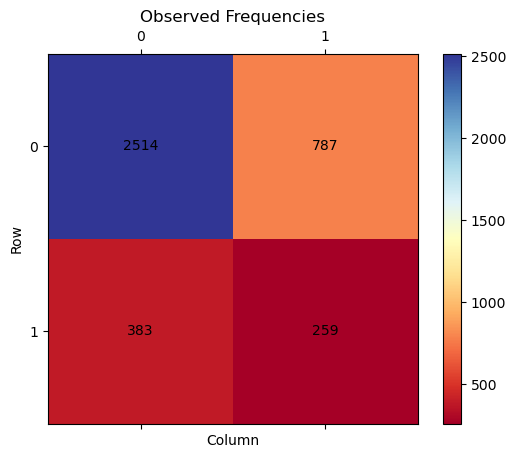

In [12]:
# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(senior_observed1, cmap='RdYlBu')
fig.colorbar(cax)

# Add text to each cell
for i in range(senior_observed1.shape[0]):
    for j in range(senior_observed1.shape[1]):
        ax.text(j, i, senior_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()



                        

In [13]:
print(f'The p-value is less than the alpha: {p < alpha}')

if p < alpha:
    print('Outcome: We reject the null')
else:
    print("Outcome: We fail to reject the null")
    

The p-value is less than the alpha: True
Outcome: We reject the null



#### Tenure Hypothesis:  

* alpha = .05 
* H0 = Tenure is independent of customer churn 
* Ha = Tenure is dependent to customer churn  


In [14]:
alpha = 0.05
tenure_observed = pd.crosstab(train.tenure, train.churn)
tenure_observed

churn,0,1
tenure,,
0,8,0
1,121,212
2,60,72
3,56,49
4,54,44
5,32,29
6,45,19
7,47,33
8,43,21


In [15]:
# Example contingency table
tenure_observed1 = np.array([
    [8, 0],
    [121, 212],
    [60, 72]
])    

In [16]:
chi2, p, dof, expected = chi2_contingency(senior_observed)

In [17]:
# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 74.24361476113086
p-value: 6.9047796790463896e-18
Degrees of freedom: 1
Expected frequencies: [[2425.30991631  875.69008369]
 [ 471.69008369  170.30991631]]


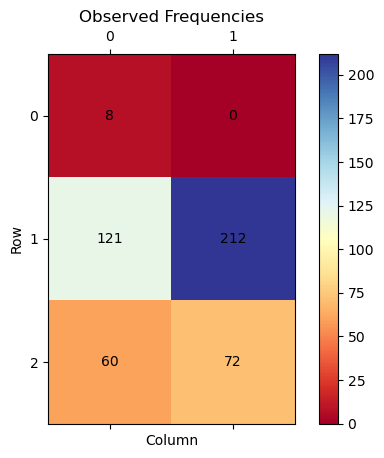

In [18]:
# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(tenure_observed1, cmap='RdYlBu')
fig.colorbar(cax)

# Add text to each cell
for i in range(tenure_observed1.shape[0]):
    for j in range(tenure_observed1.shape[1]):
        ax.text(j, i, tenure_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()

In [19]:
print(f'The p-value is less than the alpha: {p < alpha}')

if p < alpha:
    print('Outcome: We reject the null')
else:
    print("Outcome: We fail to reject the null")
    

The p-value is less than the alpha: True
Outcome: We reject the null



#### Intenet Service Type Hypothesis:  
* alpha = .05 
* H0 = Internet Service Type is independent of customer churn 
* Ha = Internet Service Type is dependent to customer churn  


In [20]:
alpha = 0.05
internet_observed = pd.crosstab(train.internet_service_type, train.churn)
internet_observed 

churn,0,1
internet_service_type,,
DSL,1095,254
Fiber optic,1019,726
None,783,66


In [21]:
# Example contingency table
internet_observed1 = np.array([
    [1095, 254],
    [1019, 726],
    [783, 66]
])

In [22]:
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(internet_observed)

In [23]:
# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 397.7388778433559
p-value: 4.286472650791297e-87
Degrees of freedom: 2
Expected frequencies: [[ 991.13695156  357.86304844]
 [1282.08597515  462.91402485]
 [ 623.77707329  225.22292671]]


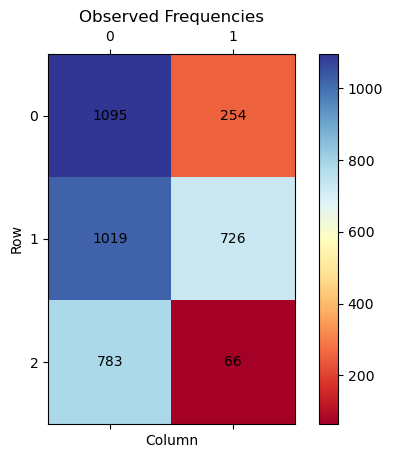

In [24]:
# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(internet_observed1, cmap='RdYlBu')
fig.colorbar(cax)

# Add text to each cell
for i in range(internet_observed1.shape[0]):
    for j in range(internet_observed1.shape[1]):
        ax.text(j, i, internet_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()

In [25]:
print(f'The p-value is less than the alpha: {p < alpha}')

if p < alpha:
    print('Outcome: We reject the null')
else:
    print("Outcome: we fail to reject the null")

The p-value is less than the alpha: True
Outcome: We reject the null


#### Statistical Findings

- Senior Citizen Hypothesis - We reject the Null Hypothesis, senior citizen status is dependent on customer churn.
- Tenure Hypothesis - We reject the Null Hypothesis, tenure is dependent on customer churn. 
- Internet Service Hypothesis We reject the Null Hypothesis, internet service type is is dependent on customer churn.

## MODEL


In [26]:
#Split the data in to X and Y for all datasets with churn and those without 
X_train = train.select_dtypes(exclude=['object']).drop(columns=['churn'])
y_train = train.select_dtypes(exclude=['object']).churn

X_validate = validate.select_dtypes(exclude=['object']).drop(columns=['churn'])
y_validate = validate.select_dtypes(exclude=['object']).churn

X_test = test.select_dtypes(exclude=['object']).drop(columns=['churn'])
y_test = test.select_dtypes(exclude=['object']).churn

### Evaluate on Baseline

In [27]:
#Exploring churn The majority churn. value counts were '0', and will be use to define baseline
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [28]:
baseline =(y_train==0).mean()
print(f'The baseline accuracy is: {baseline:.2%}')



The baseline accuracy is: 73.47%


### RANDOM FOREST

In [29]:
#Make Random Forest Classifier model
random = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=40)

In [30]:
#Fit  Random Forest Classifier model 
random.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=40)

In [31]:
#Use  Random Forest Classifier model 
print(f'training score: {random.score(X_train, y_train):.2%}')
print(f'validate score: {random.score(X_validate, y_validate):.2%}')
print('Random forest scores are both higher than baseline accuracy')

training score: 89.09%
validate score: 78.59%
Random forest scores are both higher than baseline accuracy


### LOGISTIC REGRESSION

In [32]:
# Make Logistic Regression model
logreg = LogisticRegression(C=1, random_state=40)

In [33]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1, random_state=40)

In [34]:
y_pred = logreg.predict(X_train)

In [35]:
print(f'logistic regression training score: {logreg.score(X_train, y_train):.2%}')
print(f'logistic regression validate score: {logreg.score(X_validate, y_validate):.2%}')
print('Logistic regression scores are both higher than baseline accuracy')

logistic regression training score: 78.70%
logistic regression validate score: 78.47%
Logistic regression scores are both higher than baseline accuracy


### DECISION TREE

In [36]:
# Make, FIT, Use Decision Tree
decision = DecisionTreeClassifier(max_depth=3, random_state=40)
decision = decision.fit(X_train, y_train)


In [37]:
print(f'Decision tree training score: {decision.score(X_train, y_train):.2%}')
print(f'Decision tree validate score: {decision.score(X_validate, y_validate):.2%}')
print('Decision tree scores are both higher than baseline accuracy')

Decision tree training score: 78.52%
Decision tree validate score: 78.53%
Decision tree scores are both higher than baseline accuracy


###  TOP Model Selection
Although Random Forest models scored higher than the baseline accuracy of 74%, and the scores were consistent in both training and validation models, Decision Tree and Logistic Regression models had better accuracy and consistency than Random Forest Tree, with both model sets achieving an accuracy of around 79%. The Decision Tree model was chosen.

### TOP MODEL  Test

In [38]:
decision.fit(X_test, y_test)
y_prediction = decision.predict(X_test)
# decision.classes_
#  decision.predict_proba(X_test) [:,1]

In [39]:
print(f'Decision tree test score: {decision.score(X_test, y_test):.2%}')
print('Train & Validate decision tree model scores were higher than baseline accuracy with a consistant accuracy of 79%. Test Decesion Tree was 81%')

Decision tree test score: 80.70%
Train & Validate decision tree model scores were higher than baseline accuracy with a consistant accuracy of 79%. Test Decesion Tree was 81%


In [40]:
y_test_pred = pd.DataFrame({
    'customer_id': test['customer_id'],
    'Probability of churn': decision.predict_proba(X_test) [:,1],
    'Test Prediction': decision.predict(X_test)
})
y_test_pred.head()

,customer_id,Probability of churn,Test Prediction
3160,4531-AUZNK,0.098958,0
1577,2296-DKZFP,0.048544,0
6823,9692-TUSXH,0.373016,0
3615,5129-JLPIS,0.373016,0
882,1273-MTETI,0.746032,1


In [41]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1035
           1       0.73      0.44      0.55       374

    accuracy                           0.81      1409
   macro avg       0.77      0.69      0.71      1409
weighted avg       0.80      0.81      0.79      1409



## Conclusion Summary 

- Three features  selected based on their visual significance and chi-square statistical testing for training the Classification Model to determine their significant relationship to churn.
- Senior Citizen Hypothesis - We reject the Null Hypothesis, senior citizen status is dependent on customer churn.
- Tenure Hypothesis - We reject the Null Hypothesis, tenure is dependent on customer churn. 
- Internet Service Hypothesis We reject the Null Hypothesis, internet service type is is dependent on customer churn.
- Decision Tree, Logistic Regression, and Random Forest models were implemented with a Random Seed of 40 to avoid overfitting.
- The Deceision and Logistic Regression model outperformed the baseline accuracy of 73% and consistently. Decision Tree Model was selected as Top Model and achieved an accuracy of approximately 80% on the train, validate, and test sets.


## Recommendations 
1. Telco should focus on retaining senior citizens by providing them with senior citizen discounts or services.
2. Telco should focus on retaining customers with long tenure by providing them with loyalty programs or other incentives.
3. Telco should focus on improving the internet service speeds for customers with DSL orand coverage and bundle deals  for customers with no internet service.

## Takeaways
1. The factors of senior citizen status, tenure, and internet service type can influence customer churn at Telco.

2. Telco should focus on retaining customers who are more likely to churn by providing them with special discounts, service upgrades, or incentives

3. Improving these factors can reduce churn rates.


### Sources

1. Carter, A. (2023). Classification Project. GitHub. Retrieved from https://github.com/annie-carter/classification_project


